# Convert h5ad object to R

In [1]:
import scanpy as sc
import gzip
from pathlib import Path
import os
from scipy.io import mmwrite
import pandas as pd

def h5ad_to_seuratObj(adata_fp,output_dir,dataset_name=None):
    if dataset_name is None:
        dataset_name = Path(adata_fp).stem
    if not os.path.isdir(output_dir):
        os.mkdir(output_dir)
        
    adata = sc.read_h5ad(adata_fp)
    
    # write OBS
    adata.obs.to_csv(f"{output_dir}/{dataset_name}_obs.csv.gz", compression="gzip")
    # write VAR
    adata.var.to_csv(f"{output_dir}/{dataset_name}_var.csv.gz", compression="gzip")
    # write UMAP coordinates
    umap_df = pd.DataFrame(
        adata.obsm['X_umap'],
        index=adata.obs.index,
        columns=['UMAP_1', 'UMAP_2'])
    umap_df.to_csv(f"{output_dir}/{dataset_name}_UMAP.csv.gz", compression="gzip")

    # write barcodes.tsv.gz
    barcodes = adata.obs.index.to_series()
    barcodes.to_csv(f"{output_dir}/barcodes.tsv.gz", index=False, sep='\t', compression="gzip", header=False)

    # write features.tsv.gz
    if 'gene_ids' in adata.var.columns:
        gene_id_column = 'gene_ids'
    else:
        gene_id_column = 'gene_ids-1'
        
    features = adata.var[[gene_id_column]]
    features['geneName'] = features.index
    features = features[['geneName','geneName',gene_id_column]]
    features.to_csv(f"{output_dir}/features.tsv.gz", index=False, sep='\t', compression="gzip", header=False)

    # Write the matrix to matrix.mtx.gz
    matrix_path = os.path.join(output_dir, "matrix.mtx.gz")
    with gzip.open(matrix_path, 'wb') as f:
        mmwrite(f, adata.layers['counts'].T)
    


# Fetal liver published 2n samples

In [2]:
adata_fp='/home/jovyan/Aneuploidy/Results/0_reprocessing_fetalREF/fetal_liver_alladata.h5ad'
adata = sc.read_h5ad(adata_fp)

output_dir = '/home/jovyan/Aneuploidy/Results/0_reprocessing_fetalREF/'
# write OBS
adata.obs.to_csv(f"{output_dir}/muzz_fetal_liver_obs.csv.gz", compression="gzip")



# Fetal BM published 2n-T21 samples

In [9]:
adata_fp='/home/jovyan/Aneuploidy/Results/0_reprocessing_fetalREF/fig1b_fbm_scaled_gex_updated_dr_20210104.h5ad'
adata = sc.read_h5ad(adata_fp)

output_dir = '/home/jovyan/Aneuploidy/Results/0_reprocessing_fetalREF/'
# write OBS
adata.obs.to_csv(f"{output_dir}/laura_fBM_obs.csv.gz", compression="gzip")



In [10]:
adata.obs

,cell.labels,lanes,orig.ident,sequencing.type,broad_fig1_cell.labels,stage,sex
index,,,,,,,
F21_boneMarrow_CD45+_FCAImmP7179367_3prime_AAACGGGGTAAGTAGT,early erythroid,FCAImmP7179367,F21,3prime,erythroid,Stage 3,male
F21_boneMarrow_CD45+_FCAImmP7179367_3prime_AACTCCCCAGTATAAG,erythroid macrophage,FCAImmP7179367,F21,3prime,stroma,Stage 3,male
F21_boneMarrow_CD45+_FCAImmP7179367_3prime_AACTGGTGTAAGTGTA,neutrophil,FCAImmP7179367,F21,3prime,neutrophil,Stage 3,male
F21_boneMarrow_CD45+_FCAImmP7179367_3prime_AAGACCTAGTCATGCT,CD14 monocyte,FCAImmP7179367,F21,3prime,monocyte,Stage 3,male
F21_boneMarrow_CD45+_FCAImmP7179367_3prime_AAGGAGCGTGAGTATA,DC precursor,FCAImmP7179367,F21,3prime,DC,Stage 3,male
...,...,...,...,...,...,...,...
TTTGGTTAGATGATTG-1-WSSS_F_BON8710643,mid erythroid,WSSS_F_BON8710643,SB19PCW,3prime,erythroid,Stage 4,male
TTTGGTTGTGGATCGA-1-WSSS_F_BON8710643,neutrophil,WSSS_F_BON8710643,SB19PCW,3prime,neutrophil,Stage 4,male
TTTGTTGAGTTGGCGA-1-WSSS_F_BON8710643,late erythroid,WSSS_F_BON8710643,SB19PCW,3prime,erythroid,Stage 4,male


In [6]:
adata_fp='/home/jovyan/Aneuploidy/Results/0_reprocessing_fetalREF/fig5a_downs_fbm_scaled_gex_updated_dr_20210119.h5ad'
adata = sc.read_h5ad(adata_fp)

output_dir = '/home/jovyan/Aneuploidy/Results/0_reprocessing_fetalREF/'
# write OBS
adata.obs.to_csv(f"{output_dir}/laura_fBM_T21_obs.csv.gz", compression="gzip")



In [8]:
adata.obs

,age,cell.labels,lanes,orig.ident,sequencing.type,sex,broad_extfig7A_cell.labels
AAACCTGAGTACGTTC-1-DSOX4,13PCW,early erythroid,DSOX4,D1,5GEX,male,erythroid
AAACCTGCAAGCGATG-1-DSOX4,13PCW,late erythroid,DSOX4,D1,5GEX,male,erythroid
AAACGGGCACCGAAAG-1-DSOX4,13PCW,promonocyte,DSOX4,D1,5GEX,male,monocyte
AAACGGGGTTATGCGT-1-DSOX4,13PCW,late erythroid,DSOX4,D1,5GEX,male,erythroid
AAAGATGGTAGCACGA-1-DSOX4,13PCW,pre B cell,DSOX4,D1,5GEX,male,B_lineage
...,...,...,...,...,...,...,...
TTTGTCACATCTACGA-1-DSOX19,pooled_12-13_PCW,CD8 T cell,DSOX19,D4,5GEX,male,T/NK
TTTGTCAGTATTAGCC-1-DSOX19,pooled_12-13_PCW,late erythroid,DSOX19,D4,5GEX,male,erythroid
TTTGTCAGTGCACTTA-1-DSOX19,pooled_12-13_PCW,mid erythroid,DSOX19,D4,5GEX,male,erythroid
TTTGTCATCAAGGCTT-1-DSOX19,pooled_12-13_PCW,late erythroid,DSOX19,D4,5GEX,male,erythroid


# Mosteiro23 etal

In [25]:
adata_fp='/nfs/team292/Thyroid_hm11_mt22/public_normal_datasets/Mosteiro_2023_cThy.h5ad'
adata = sc.read_h5ad(adata_fp)

# output_dir = '/nfs/team292/Thyroid_hm11_mt22/public_normal_datasets_mtx'
# h5ad_to_seuratObj(adata_fp=adata_fp,output_dir=output_dir,dataset_name='Mosteiro_2023')


In [34]:
barcodes = adata.obs.index.to_series()
output_dir = '/nfs/team292/Thyroid_hm11_mt22/public_normal_datasets_mtx/Mosteiro_2023/mtx/'
barcodes.to_csv(f"{output_dir}/barcodes.tsv.gz", index=False, sep='\t', compression="gzip", header=False)

In [37]:
features = adata.var
features['geneName'] = features.index
features = features[['geneName','geneName']]
features.to_csv(f"{output_dir}/features.tsv.gz", index=False, sep='\t', compression="gzip", header=False)


In [35]:
# Write the matrix to matrix.mtx.gz
matrix_path = os.path.join(output_dir, "matrix.mtx.gz")
with gzip.open(matrix_path, 'wb') as f:
    mmwrite(f, adata.layers['counts'].T)


# Wang22 etal

In [19]:
adata_fp='/nfs/team292/Thyroid_hm11_mt22/public_normal_datasets/Wang_2022_cThy.h5ad'
#adata = sc.read_h5ad(adata_fp)

output_dir = '/nfs/team292/Thyroid_hm11_mt22/public_normal_datasets_mtx/Wang_2022'
h5ad_to_seuratObj(adata_fp=adata_fp,output_dir=output_dir,dataset_name='Wang_2022')


<ipython-input-18-f6db3f07e024>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['geneName'] = features.index


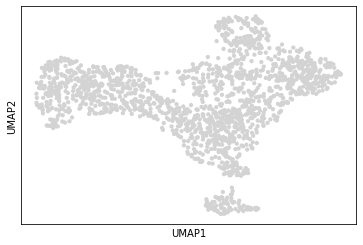

In [2]:
adata_fp='/nfs/team292/Thyroid_hm11_mt22/public_normal_datasets/Wang_2022_cThy.h5ad'
adata = sc.read_h5ad(adata_fp)
sc.pl.umap(adata)

# Hong23 etal

In [23]:
adata_fp='/nfs/team292/Thyroid_hm11_mt22/public_normal_datasets/Hong_2023_cThy.h5ad'
adata = sc.read_h5ad(adata_fp)

# output_dir = '/nfs/team292/Thyroid_hm11_mt22/public_normal_datasets_mtx/Hong_2023'
# h5ad_to_seuratObj(adata_fp=adata_fp,output_dir=output_dir,dataset_name='Hong_2023')


In [24]:
adata.var


,mt,ribo,hb,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,highly_variable,mean,std
AL627309.1,False,False,False,134,0.002467,0.002464,99.755144,135.0,4.912655,134,False,0.002073,0.035860
AL627309.3,False,False,False,7,0.000128,0.000128,99.987209,7.0,2.079442,7,False,0.000016,0.002172
AL732372.1,False,False,False,3,0.000055,0.000055,99.994518,3.0,1.386294,3,False,0.000065,0.005829
AL669831.5,False,False,False,2442,0.048131,0.047008,95.537770,2634.0,7.876638,2431,False,0.034707,0.154578
FAM87B,False,False,False,37,0.000694,0.000694,99.932390,38.0,3.663562,37,False,0.000133,0.009668
...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC023491.2,False,False,False,26,0.000475,0.000475,99.952491,26.0,3.295837,26,False,0.000629,0.019377
AC004556.1,False,False,False,19,0.000347,0.000347,99.965282,19.0,2.995732,19,False,0.000461,0.020076
AC233755.2,False,False,False,51,0.005537,0.005521,99.906808,303.0,5.717028,43,False,0.000023,0.003247
AC233755.1,False,False,False,91,0.004934,0.004922,99.833717,270.0,5.602119,83,False,0.000068,0.006760


In [2]:
adata_fp='/nfs/team292/Thyroid_hm11_mt22/cdata_2n_T21_all.h5ad'
adata = sc.read_h5ad(adata_fp)


In [3]:
adata

AnnData object with n_obs × n_vars = 213141 × 30997
    obs: 'n_genes', 'n_counts', 'sample', 'sample_name', 'pcw', 'sex', 'donor', 'seq_chemistry', 'scrublet_score', 'karyotype', 'lineage', 'cluster', 'celltype', 'celltype_edge', 'age_group'
    var: 'gene_ids-1', 'feature_types-1', 'n_cells-1', 'gene_ids-10', 'feature_types-10', 'n_cells-10', 'gene_ids-11', 'feature_types-11', 'n_cells-11', 'gene_ids-12', 'feature_types-12', 'n_cells-12', 'gene_ids-13', 'feature_types-13', 'n_cells-13', 'gene_ids-14', 'feature_types-14', 'n_cells-14', 'gene_ids-15', 'feature_types-15', 'n_cells-15', 'gene_ids-16', 'feature_types-16', 'n_cells-16', 'gene_ids-17', 'feature_types-17', 'n_cells-17', 'gene_ids-18', 'feature_types-18', 'n_cells-18', 'gene_ids-19', 'feature_types-19', 'n_cells-19', 'gene_ids-2', 'feature_types-2', 'n_cells-2', 'gene_ids-20', 'feature_types-20', 'n_cells-20', 'gene_ids-21', 'feature_types-21', 'n_cells-21', 'gene_ids-3', 'feature_types-3', 'n_cells-3', 'gene_ids-4', 'feature

In [16]:
adata.layers['counts'][1000:1005,11000:11005].toarray()


array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 2., 0., 0.],
       [0., 0., 3., 0., 0.]], dtype=float32)

In [10]:
adata.raw.X[1000:1005,11000:11005].toarray()

array([[0.        , 0.        , 0.961858  , 0.        , 0.        ],
       [0.        , 0.        , 0.6142773 , 0.        , 0.        ],
       [0.        , 0.        , 0.91942215, 0.        , 0.        ],
       [0.        , 0.80044985, 1.239268  , 0.        , 0.        ],
       [0.        , 0.        , 1.2819651 , 0.        , 0.        ]],
      dtype=float32)

In [13]:
adata.X[1000:1005,11000:11005].toarray()

array([[0.        , 0.        , 0.961858  , 0.        , 0.        ],
       [0.        , 0.        , 0.6142773 , 0.        , 0.        ],
       [0.        , 0.        , 0.91942215, 0.        , 0.        ],
       [0.        , 0.80044985, 1.239268  , 0.        , 0.        ],
       [0.        , 0.        , 1.2819651 , 0.        , 0.        ]],
      dtype=float32)

In [1]:
import scanpy as sc
adata_fp='/nfs/team292/Thyroid_hm11_mt22/cdata_2n_T21_all.h5ad'
adata = sc.read_h5ad(adata_fp)

/home/jovyan/my-conda-envs/palantir/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


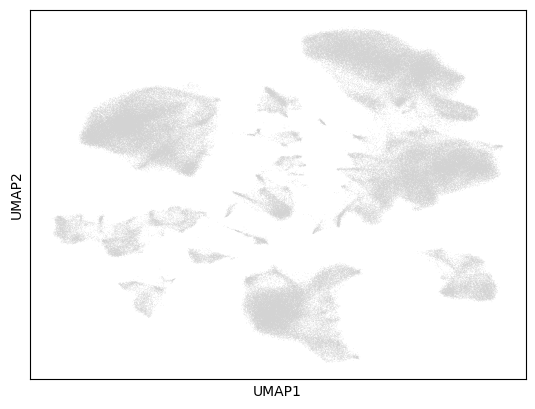

In [4]:
sc.pl.umap(adata)